# Lab 6.1: Simple Linear Regression

**Question 1**  

The scatterplots below show the relationship between height, diameter, and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.  

<img src="images/lab6_1_q4.png" width="600">  

(a) Describe the relationship between volume and height of these trees.  

#### Answer 1a: volume and height don't seem to have a direct, clear relationship. It could be linear, but they seem have a low, yet positive, covariance. 

(b) Describe the relationship between volume and diameter of these trees.  

#### Answer 1b: volume and diameter follow roughly a linear relationship. They are directly proportional.

(c) Suppose you have height and diameter measurements for another black cherry tree. Which of these variables would be preferable to use to predict the volume of timber in this tree using a simple linear regression model? Explain your reasoning.

#### Answer 1c: volume and diameter would be the better relationship to use to predict volume. There is a much more linear relationship between those two variables, so creating a predictive model on their relationship would create more accurate predictions.

**Question 2**  

The Coast Starlight Amtrak train runs from Seattle to Los Angeles.  

The mean travel time from one stop to the next on the Coast Starlight is 129 mins, with a standard deviation of 113 minutes. The mean distance traveled from one stop to the next is 108 miles with a standard deviation of 99 miles. The correlation between travel time and distance is 0.636.  

(a) Write the equation of the regression line for predicting travel time.  

#### Answer 2a: 

$y = mx + b$

$m = r \frac{s_y}{s_x} \\ m = (.636) \frac{113}{99} \\ m = .72594$

$108 = .72594(129) + b \\ b = 14.354$ 

$$y = .72594x + 14.354$$

In [2]:
m = .636*(113/99)
b = 108 - (.72594*129)
print("m is", m)
print("b is", b)

m is 0.725939393939394
b is 14.353740000000002


(b) Interpret the slope and the intercept in this context.  

#### Answer 2b: 
for every minute that passes, the Coast Starlight travels 0.72594 miles. The intercept represents the minimum distance traveled. The intercept in this case is not very useful/relevant, but acts more as an anchor for the model.

(c) Calculate $R^2$ of the regression line for predicting travel time from distance traveled for the Coast Starlight, and interpret $R^2$ in the context of the application.  

#### Answer 2c: 

$R^2 = \rho^2 \\ R^2 = (.636)^2 \\ R^2 = 0.404496$

In [3]:
r = .636
r**2

0.404496

(d) The distance between Santa Barbara and Los Angeles is 103 miles. Use the model to estimate the time it takes for the Starlight to travel between these two cities.  

In [6]:
SB_LA = .72594*103 + 14.354
print("Estimated minutes to go from Santa Barbara to Los Angeles", SB_LA)

Estimated minutes to go from Santa Barbara to Los Angeles 89.12582


(e) It actually takes the Coast Starlight about 168 mins to travel from Santa Barbara to Los Angeles. Calculate the residual and explain the meaning of this residual value.  

#### Answer 2e:

$residual = 168 - 89 \\ residual = 79 \ \text{minutes}$

This is the difference between the acutal value and the predicted value, and it represents the error in this one observation.

(f) Suppose Amtrak is considering adding a stop to the Coast Starlight 500 miles away from Los Angeles. Would it be appropriate to use this linear model to predict the travel time from Los Angeles to this point?  

#### Answer 2f:
Predicting travel time for such a long distance might not be the best use of this model. We would want to add for additional variables to travel time for longer distances. Our residual for a trip 1/5 of this distance resulted in a 79 min residual, so as distance increases, so does the effect of any inaccuracies of the model.

**Question 3**

You are given data about students' test results and the number of hours they study below:

```
Test results:    30, 45, 85, 100
Hours of study:  5,  7 , 10, 70
```

1) We will use the following model to predict the test results based on the number of hours a student studies:
   
   $\text{test result} = \beta_0 + \beta_1 \text{number of hours} ＋ \varepsilon$
   
   Explain what $\beta_0$ represents in the model. 
   

   

#### Answer 3.1:

$\beta_0$ is the slope intercept or the minimum test score assuming zero hours studied.

2) Using the oridinary least square approach, find $b_0$ ($\hat{\beta}_0$) and $b_1$($\hat{\beta}_1$) for the proposed model that best fits the data. 


   

In [9]:
%pylab inline
import pandas as pd
import statsmodels.api as sm

X = [5, 7, 10, 70]
X = sm.add_constant(X)
y = [30, 45, 85, 100]

model = sm.OLS(y, X)
results = model.fit()
results.summary()

Populating the interactive namespace from numpy and matplotlib


/Users/victorvulovic/anaconda/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     2.620
Date:                Wed, 05 Oct 2016   Prob (F-statistic):              0.247
Time:                        23:21:41   Log-Likelihood:                -17.401
No. Observations:                   4   AIC:                             38.80
Df Residuals:                       2   BIC:                             37.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         46.8442     17.368      2.697      0.114       -27.884   121.572
x1             0.7894      0.488      1.619      0.247        -1.309     2.888
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.879
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.463
Skew:                           0.694   Prob(JB):                        0.793
Kurtosis:                       2.079   Cond. No.                         46.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### y = Bo + B1*x
y = 46.84 + 0.7894x

3) What criteria are used to estimate $\beta_0$ and $\beta_1$ in part 2)? Compute the SSE (residual sum of squares) of the model.    

   

** The residual must be normally distributed around the estimated points. **

In [2]:
import numpy as np
x=[5,7,10,70]
y=[30,45,85,100]
xm = np.mean(x)
ym = np.mean(y)

In [3]:
SSE = sum([(0.7894*x[i] + 46.84 - y[i])**2 for i in range(len(x))])
SSE

1406.7867386400003

4) Compute the TSS (total sum of squares) and SSR (regression sum of squaress). Express and compute the $R^2$ of the model in terms of TSS, RSS and/or SSE. Explain what $R^2$ represents.  
   
   

In [4]:
TSS = sum([(y[i] - ym)**2 for i in range(len(x))])
TSS

3250.0

In [5]:
RSS = sum([(0.7894*x[i] + 46.84 - ym)**2 for i in range(len(x))])
RSS

1843.2847386400006

In [6]:
r_squared = RSS/TSS
r_squared

0.56716453496615404

** The model we are using will only account for 56% of the data variations.  **

5) Plot the number of hours of study (x) against test result (y) on a scatter plot. Plot the OLS regression line on top of the data.

In [7]:
import matplotlib.pyplot as plt

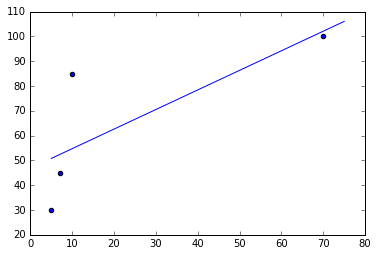

In [8]:
plt.figure()
plt.scatter(x,y)
x_s = [i for i in range(5,80,5)]
y_s = [0.7894*a + 46.84 for a in x_s]
plt.plot(x_s,y_s)


**Question 4**  

In the table `utils` (in RDS) are the average utility bills for homes of a particular size (Y) and the average monthly temperature (X).  

(a) Make a scatter plot of the data.  

In [10]:
from sqlalchemy import create_engine
import yaml
pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

In [12]:
utils = pd.read_sql('utils',engine)

In [13]:
utils.head()

,month,bill,temp
0,Jan,148.5,38
1,Feb,136.5,45
2,Mar,117.0,49
3,Apr,91.5,57
4,May,82.5,69


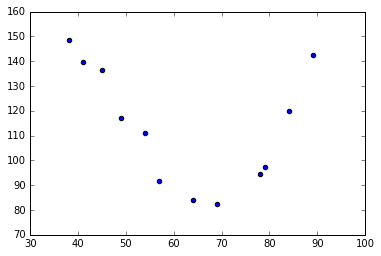

In [14]:
plt.scatter(utils.temp,utils.bill)

(b) Does it appear from inspection that there is a relationship between the variables? Why or why not?  

** There seems to be a non-linear relationship between the temperature and the bill. Considering a parabolla through the points there seems to be small residuals. **

(c) Calculate the least squares line.  

In [15]:
X2 = utils['temp']
X2 = sm.add_constant(X2)
y = utils['bill']

model = sm.OLS(y, X2)
results = model.fit() #run fit in order to get the parameters
results.summary()

/Users/victorvulovic/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   bill   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.416
Date:                Wed, 05 Oct 2016   Prob (F-statistic):              0.261
Time:                        23:26:22   Log-Likelihood:                -53.778
No. Observations:                  12   AIC:                             111.6
Df Residuals:                      10   BIC:                             112.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        143.6228     25.995      5.525      0.000        85.701   201.544
temp          -0.4799      0.403     -1.190      0.261        -1.378     0.419
==============================================================================
Omnibus:                        0.570   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.588
Skew:                           0.272   Prob(JB):                        0.745
Kurtosis:                       2.062   Cond. No.                         248.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

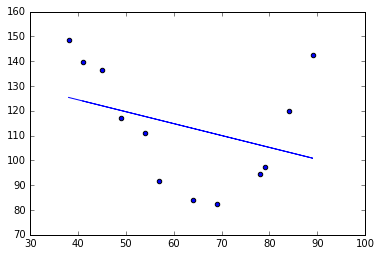

In [22]:
plt.scatter(utils.temp,utils.bill)
x = utils['temp']
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b, '-');

### Model line:

$y = 25.995 - 0.4799x$

(d) Calculate and interpret the value of $R^2$.  

#### 4d commentary
The R^2 is .124 and it means that 12.4% of the variance is explained by the model.

(e) Interpret the intercept and slope coefficients.  

#### 4e commentary
The intercept is 29.995, and according to the model, it means that the minimum bill even if temperature was 0 would be $25.99. The slope signifies that for every degree that temperature increases, the bill increases by $0.47 dollars.

(f) What is the 95% confidence interval for the slope?  

#### 4f commentary
The 95% CI for slope is (-1.378, 0.419)

(g) Is the average monthly temperature a significant predictor of the average utility bill? Why or why not?  

#### 4g commentary

it likely is an accurate predictor, but it does not have a linear relationship. For temperatures between 30 and 70 degrees, it is an obviously negative linear relationship. For values above 70 degrees, it's a positive relationship. if we could model this as a parabolic relationship, we would have much better prediction power.

(e) Use the least squares line to estimate the average utility bill if the average monthly temperature is 120 degrees. Do you think that your answer is reasonable? Why or why not? 

In [16]:
25.995 - .4799*(120)

-31.593

#### 4h commentary

$y = 25.995 - 0.4799x \\ y = 25.995 - 0.4799(120) \\ y = -31.593$

For similar reasons as described in 4g, it's not a reasonable answer. Also, it doesn't make sense the bill would be negative dollars. The utility company would never give money back to the consumer, especially not when its 120 degrees outside.